## Observations and Insights 

### Some observations seen:
First looking at the bar-graph data. glaring conclusions can be found with the median size of the tumors vs the treatment. 
Capomulin with and average of 40.675741mm3 vs the placebo/constant of 54.033581mm3

This shows great results with the Capomulin Drug Regimen to being able to effectively treat the tumor. Another noteable drug with very similar results to Capomulin was Ramicane with 40.216745mm3


Other small observations that was able to be seen was the comparison of male subjects vs females subjects. in the population size, male subjects were more common than female ones, coming at a 51% majority. 

It is also possible to see a positive increasing correlation between a mouse's weight and the tumor size it is carrying, this makes sense considering the larger the subject, the larger the turmor is on the subject as well.

The data was also cleaned of duplicates and unclear solutions, such as outliers.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from math import sqrt
from sklearn import datasets
from scipy.stats import linregress

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#make the mouse data in DataFrames
mouseMetaDF = pd.DataFrame(mouse_metadata, columns= ["Mouse ID", "Drug Regimen", "Sex", "Age_months", "Weight (g)"])
studyResultsDF = pd.DataFrame(study_results, columns = ["Mouse ID","Timepoint","Tumor Volume (mm3)","Metastatic Sites"])


# Combine the data into a single dataset

mergeDF = pd.merge(mouseMetaDF, studyResultsDF, on = "Mouse ID", how = "outer")

# Display the data table for preview, The info of the first two mice
mergeDF.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
# Checking the number of mice.
#print(f"The number of mice in the study is: {len(mouseMetaDF)}")
MouseDF = mergeDF[["Mouse ID"]]

print(f"The number of unique mice in the study is: \n{MouseDF.nunique()}")

The number of unique mice in the study is: 
Mouse ID    249
dtype: int64


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRowsDF = mergeDF[mergeDF.duplicated(['Mouse ID', 'Timepoint'])]

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateRowsDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleanDF = mergeDF.drop(mergeDF.index[mergeDF["Mouse ID"] == "g989"])

In [7]:
# Checking the number of mice in the clean DataFrame
MouseDF = cleanDF[["Mouse ID"]]

print(f"The number of unique mice in the study is: \n{MouseDF.nunique()}")
#removed the duplicate mouse causing errors, hence cleaning the data

The number of unique mice in the study is: 
Mouse ID    248
dtype: int64


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

drugDF = cleanDF[["Drug Regimen", "Tumor Volume (mm3)"]]


drugMeanDF = drugDF.groupby(["Drug Regimen"]).mean()
drugMeanDF.columns = ["Mean"]
drugMedianDF =drugDF.groupby(["Drug Regimen"]).median()
drugMedianDF.columns = ["Median"]
drugVariance = drugDF.groupby(["Drug Regimen"]).var()
drugVariance.columns = ["vars"]
drugStd = drugDF.groupby(["Drug Regimen"]).std()
drugStd.columns = ["std"]
drugSem = drugDF.groupby(["Drug Regimen"]).sem()
drugSem.columns = ["sem"]

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

statsDF = pd.concat([drugMeanDF, drugMedianDF, drugVariance, drugStd, drugSem], axis =1, join = 'inner')
statsDF

,Mean,Median,vars,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
#Single like .agg statistical function
allDrugDF = drugDF.groupby(["Drug Regimen"]).agg(['mean','median','var','std','sem'])
allDrugDF

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

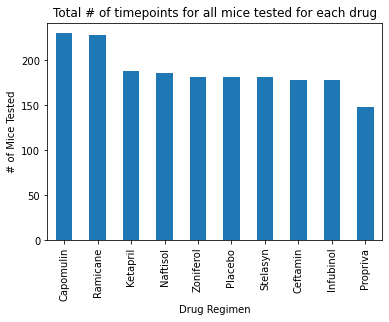

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
timepointDF = cleanDF[["Drug Regimen", "Timepoint"]]
timepointCount = timepointDF.value_counts("Drug Regimen")

fig1 = timepointCount.plot(kind ="bar",
                        title="Total # of timepoints for all mice tested for each drug",
                        xlabel="Drug Regimen", ylabel = "# of Mice Tested")

plt.show()

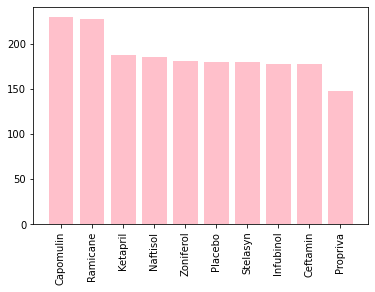

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(timepointCount))
tick_locations = [value for value in x_axis]

drug_dic = dict()
testDF = timepointDF.iloc[:,:1]
for drug in timepointDF.iloc[:,:1]["Drug Regimen"]:
    if drug not in drug_dic:
        drug_dic[drug] = 0
    else:
        drug_dic[drug] = drug_dic[drug] + 1

sorted_dic_drug = dict(sorted(drug_dic.items(), key=lambda x:x[1], reverse = True))
the_drugs = list(sorted_dic_drug.keys())
the_tps = list(sorted_dic_drug.values())
plt.bar(the_drugs, the_tps, color = "pink")
plt.xticks(rotation=90);

# Python lambda example:
# x = lambda a : a + 10
# print(x(5)) Used this to aid in the sorting and plotting

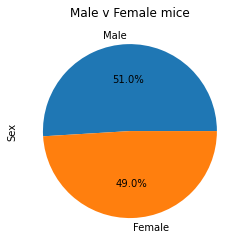

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
genderDF = cleanDF[["Sex"]]
genderCount = genderDF.value_counts("Sex")

fig2 = genderCount.plot(kind ="pie",
                        title="Male v Female mice", autopct = "%1.1f%%",ylabel="Sex")

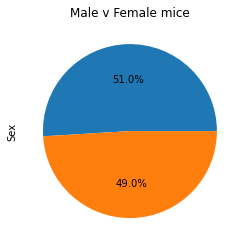

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("Male v Female mice")
plt.ylabel("Sex")
plt.pie(genderCount,autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

finalDF= cleanDF[["Mouse ID","Drug Regimen", "Timepoint" , "Tumor Volume (mm3)"]]
finalDF[finalDF["Drug Regimen"].isin(["Capomulin","Ramicane","Infubinol","Ceftamin"])] # gets only the certain drug regimens


# Start by getting the last (greatest) timepoint for each mouse

timepointMaxDF = finalDF.loc[finalDF.groupby("Mouse ID")["Timepoint"].idxmax()].copy() #This output only has the largset Timepoints


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [15]:
 # Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
   
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
    print(f"{drug}'s potential outliers: {outliers}")

NameError: name 'outliers' is not defined

In [ ]:
###Using Matplotlib, generate a box plot of the final tumor volume for all four treatment regimens
#Create a list that holds the treatment names
treatment_list=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


capomulin = timepointMaxDF.loc[timepointMaxDF["Drug Regimen"] == "Capomulin",:]
capo = capomulin['Tumor Volume (mm3)']

ramicane = timepointMaxDF.loc[timepointMaxDF["Drug Regimen"] == "Ramicane",:]
rami = ramicane['Tumor Volume (mm3)']

infubinol = timepointMaxDF.loc[timepointMaxDF["Drug Regimen"] == "Infubinol",:]
infu = infubinol['Tumor Volume (mm3)']

ceftamin = timepointMaxDF.loc[timepointMaxDF["Drug Regimen"] == "Ceftamin",:]
caft = ceftamin['Tumor Volume (mm3)']
#put the grouped drug regimen data in a single data format for plotting
data = [capo, rami, infu, caft]
 
fig = plt.figure()
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
plt.boxplot(data, labels=treatment_list,flierprops=dict(markerfacecolor='g', marker='x'))
ax.set_title('Tumor volumes')
ax.set_ylabel('Final Tumor Volume (mm3)')
 
# show plot
plt.show()

In [ ]:
# find the top and lower bound
quartiles = capo.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

quartiles = capo.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound:.2f} could be outliers. \nValues above {upper_bound:.2f} could be outliers for Capomulin")


outlier_df = capomulin.loc[(capomulin['Tumor Volume (mm3)']<lower_bound)|(capomulin['Tumor Volume (mm3)']>upper_bound)]
num_outlier =len(outlier_df)
print(f"Values found as outliers werer {num_outlier} for Capmulin)  

In [ ]:
# find the top and lower bound
quartiles = rami.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

quartiles = rami.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound:.2f} are outliers \nValues above {upper_bound:.2f} are outliers for Ramicane")


outlier_df = ramicane.loc[(ramicane['Tumor Volume (mm3)']<lower_bound)|(ramicane['Tumor Volume (mm3)']>upper_bound)]
num_outlier =len(outlier_df)
print(f"Values found as outliers werer {num_outlier} for Ramicane")

In [ ]:
# find the top and lower bound
quartiles = infu.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

quartiles = infu.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound:.2f} are outliers. \nValues above {upper_bound:.2f} are outliers for infubinol")


outlier_df = infubinol.loc[(infubinol['Tumor Volume (mm3)']<lower_bound)|(infubinol['Tumor Volume (mm3)']>upper_bound)]
num_outlier =len(outlier_df)
print(f"Values found as outliers werer {num_outlier} for infubinol")

In [ ]:
# find the top and lower bound
quartiles = caft.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

quartiles = caft.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound:.2f} are outliers. \nValues above {upper_bound:.2f} are outliers for Ceftamin")


outlier_df = ceftamin.loc[(ceftamin['Tumor Volume (mm3)']<lower_bound)|(ceftamin['Tumor Volume (mm3)']>upper_bound)]
num_outlier =len(outlier_df)
print(f"Values found as outliers werer {num_outlier} for Ceftamin")

## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#select mouse id that is treated with capomulin and used it to plot
#timepoints as the x-axis and tumor volume as the y-axis

mouse_capomulin = cleanDF.loc[cleanDF['Mouse ID'] == 'g288']
plt.plot(mouse_capomulin['Timepoint'], mouse_capomulin['Tumor Volume (mm3)'])
# Add labels and title to plot
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse g288")
plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulinScatterDF = cleanDF.loc[cleanDF["Drug Regimen"] == "Capomulin"]
avgDF = capomulinScatterDF.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})

avgTumorVolDF = avgDF.groupby(["Mouse ID"]).mean()

avgTumorVolDF.head(2) #list is used for the average tumor Volume

In [ ]:
# Create a scatter plot which compares average tumor volume vs. mouse weight for the Capomulin regimen

#Using the dataframe average_tumor-volume create a scatter plot for weight and average tumor volume

avgTumorVolDF.plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)",
                           
              title="Average Tumor Volume vs. mouse weight)"  )
plt.show()

## Correlation and Regression

In [ ]:
#correlation.ipynb

#corr=round(st.pearsonr(avgTumorVolDF['Weight (g)'],avgTumorVolDF['Tumor Volume (mm3)'])[0],2)
#print(f"The correlation between both factors is {round(correlation[0],2)}")

#data_chart = linregress(avgTumorVolDF["Weight (g)"], avgTumorVolDF["Tumor Volume (mm3)"])
#data_chart

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# using Pearson correlation coefficient calculate coeff. between "average tumor volume and mouse weight"
#using the decicated capomulin df(average_tumor_volume)
avgTumorVolDF = avgTumorVolDF.iloc[:,4]
mouse_weight = avgTumorVolDF.iloc[:,4]

correlation = st.pearsonr(mouse_weight,avgTumorVolDF)

# Compare the calcualted Pearson's r to the plots
x_values = avgTumorVolDF['Weight (g)']
y_values = avgTumorVolDF['Average Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

x_values = avgTumorVolDF['Weight (g)']
y_values = avgTumorVolDF['Average Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between both factors is {round(correlation[0],2)}")

print(f"The r-squared is: {rvalue**2}")
plt.show()